### 4.1 线性回归

#### 4.1.1 标准方程

$$
\hat{\theta}  = (X^T X)^{-1} X^T y
$$

在机器学习中，向量通常表示为列向量，是有单一列的二维数组。如果$\Theta$和x为列向量，则预测为$\hat{y}=\Theta^T x$，其中$\Theta^T$为$\Theta$（行向量而不是列向量）的转置，且$\Theta^T x$为$\Theta^T$和$\Theta$的矩阵乘积。


In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

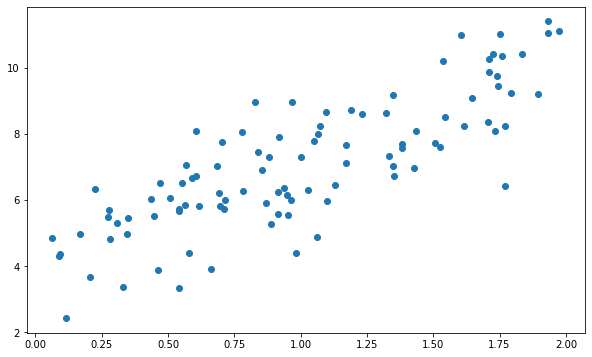

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] #在每个实例上add x0=1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.01310698],
       [3.06110884]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.01310698],
       [10.13532467]])

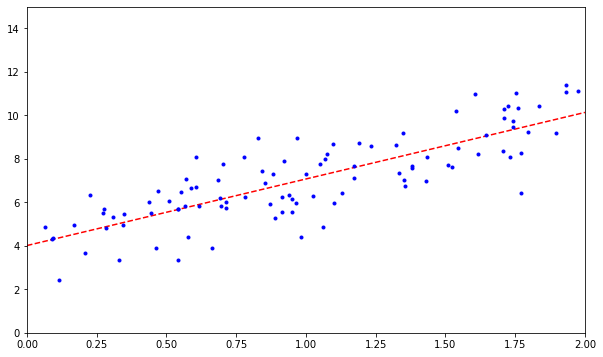

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01310698]), array([[3.06110884]]))

`LinearRegression`类基于`scipy.linalg.lstsq()`函数（最小二乘法）

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01310698],
       [3.06110884]])

此函数计算:
$$
\hat{\theta} = X^+ y
$$

其中$X^+$是$X$的伪逆，具体说是Moore-Penrose逆，可以使用`np.linalg.pinv()`直接计算这个伪逆

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.01310698],
       [3.06110884]])

伪逆本身是使用被称为奇异值分解(Singular Value Decomposition, SVD)的标准矩阵分解技术来计算的，可以将训练集$X$分解为三个矩阵$\bigcup\sum V^T$的乘积(`numpy.linalg.svd()`)。伪逆的计算公式为$X^+=V\sum^+{\bigcup}^T$。为了计算矩阵$\sum^+$, 该算法取$\sum$并将所有小于一个阈值的值设置为零，然后将所有非零值替换成他们的倒数，最后将结果矩阵转置。这种算法比计算标准方程更有效，再加上它可以很好地处理边缘情况：的确，如果矩阵$X^T X$是不可逆（即奇异的），标准方程可能没有解，如果$m \lt n$或某些特征是多余的，则伪逆总是有定义的

#### 4.1.2 计算复杂度
标准方程计算$X^T X$的逆，$X^T X$是一个$(n+1) \times (n+1)$的矩阵（$n$是特征数量）。对这种矩阵的求逆计算复杂度通常是$\large O (n^{2.4})$到$\large O (n^{3})$之间，取决于具体实现。

Scikit-Learn的`LinearRegression`类使用的SVD方法的复杂度约为$\large O(n^2)$，如果特征数量加倍，那么计算时间大约为原来的4倍。

特征数量比较大（例如100 000）时，标准方程和SVD的计算将极其缓慢。好的一面是，相对于训练集中的实例数量（O（m））来说，两个都是线性的，所以能够有效地处理大量的训练集，只要内存足够。

线性回归模型一经训练（不论是标准方程还是其他算法），预测就非常快速：因为计算复杂度相对于想要预测的实例数量和特征数量来说都是线性的。换句话说，对两倍的实例（或者是两倍的特征数）进行预测，大概需要两倍的时间。